In [53]:
import cv2
import os
from IPython.display import display
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers.legacy import SGD
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input as preprocess_input_vgg16
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input as preprocess_input_resnet50
from keras.layers.experimental import preprocessing
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import random
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset Address:

In [4]:
cat_file = '/content/drive/MyDrive/NN/HW2/Dataset/NonAug/Train/Cats'

dog_file = '/content/drive/MyDrive/NN/HW2/Dataset/NonAug/Train/Dogs'

def read_images(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (224, 224))
            images.append(img)
    return images

cats = []
dogs = []

cats = read_images(cat_file)
dogs = read_images(dog_file)

array([[[ 32,  35,  43],
        [ 32,  34,  42],
        [ 31,  33,  41],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[ 27,  29,  37],
        [ 27,  29,  37],
        [ 28,  30,  38],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[ 32,  34,  42],
        [ 32,  34,  42],
        [ 33,  35,  43],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3]],

       ...,

       [[196, 204, 204],
        [196, 204, 204],
        [187, 196, 196],
        ...,
        [149, 153, 154],
        [157, 159, 160],
        [154, 156, 157]],

       [[191, 199, 199],
        [193, 201, 201],
        [190, 198, 198],
        ...,
        [153, 157, 158],
        [149, 151, 152],
        [142, 144, 145]],

       [[170, 178, 178],
        [165, 173, 173],
        [160, 168, 168],
        ...,
        [156, 160, 161],
        [143, 145, 146],
        [137, 139, 140]]], dtype=uint8)
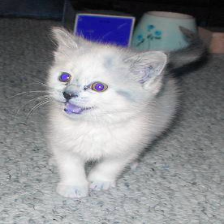

array([[[245, 248, 239],
        [248, 251, 242],
        [252, 254, 246],
        ...,
        [208, 210, 210],
        [211, 211, 212],
        [215, 214, 216]],

       [[252, 253, 248],
        [253, 255, 249],
        [254, 255, 250],
        ...,
        [222, 224, 224],
        [217, 217, 217],
        [219, 219, 219]],

       [[255, 255, 254],
        [254, 255, 253],
        [253, 254, 252],
        ...,
        [220, 222, 222],
        [220, 220, 220],
        [220, 220, 220]],

       ...,

       [[ 45, 116,  76],
        [ 42, 118,  76],
        [ 50, 130,  87],
        ...,
        [ 83, 134,  96],
        [ 89, 142, 104],
        [ 64, 116,  79]],

       [[ 39, 110,  70],
        [ 26, 101,  60],
        [ 46, 126,  83],
        ...,
        [ 71, 121,  85],
        [ 73, 126,  87],
        [ 66, 119,  80]],

       [[ 63, 134,  94],
        [ 32, 107,  65],
        [ 45, 125,  82],
        ...,
        [ 90, 140, 104],
        [ 81, 134,  95],
        [ 86, 139, 100]]], dtype=uint8)
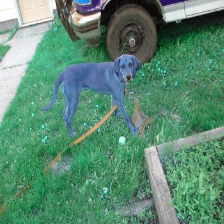

In [5]:
display(cats[10])

display(dogs[10])

In [6]:
print("Number of Cat Data:",len(cats))
print("Number of Dog Data:",len(dogs))
print("Number of Total Data:",len(cats) + len(dogs))

Number of Cat Data: 350
Number of Dog Data: 352
Number of Total Data: 702


Rotation between -30 to 30 degrees:

In [7]:
def rotation(images):

  datagen = ImageDataGenerator(rotation_range=30)
  out = []
  for image in images:
    augmented_img = next(datagen.flow(np.expand_dims(image, axis=0), batch_size=1))[0].astype(np.uint8)
    out.append(augmented_img)
  return out

array([[[165, 169, 157],
        [165, 169, 157],
        [165, 169, 157],
        ...,
        [184, 193, 205],
        [184, 194, 203],
        [184, 192, 201]],

       [[167, 171, 159],
        [167, 171, 159],
        [167, 171, 159],
        ...,
        [184, 193, 205],
        [184, 194, 203],
        [184, 192, 201]],

       [[170, 174, 162],
        [170, 174, 162],
        [170, 174, 162],
        ...,
        [184, 193, 205],
        [184, 194, 203],
        [184, 192, 201]],

       ...,

       [[217, 223, 218],
        [218, 224, 219],
        [220, 226, 221],
        ...,
        [200, 205, 211],
        [200, 205, 211],
        [200, 205, 211]],

       [[217, 223, 218],
        [218, 224, 219],
        [220, 226, 221],
        ...,
        [199, 204, 210],
        [199, 204, 210],
        [199, 204, 210]],

       [[217, 223, 218],
        [218, 224, 219],
        [220, 226, 221],
        ...,
        [197, 203, 209],
        [197, 203, 209],
        [197, 203, 209]]], dtype=uint8)
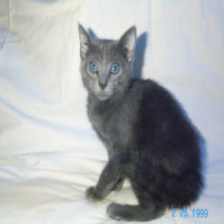

array([[[140, 161, 180],
        [124, 145, 162],
        [ 99, 120, 137],
        ...,
        [179, 198, 206],
        [169, 188, 196],
        [157, 177, 184]],

       [[154, 174, 198],
        [149, 169, 191],
        [138, 159, 178],
        ...,
        [174, 193, 201],
        [163, 182, 190],
        [146, 166, 173]],

       [[146, 168, 193],
        [150, 171, 196],
        [155, 175, 199],
        ...,
        [169, 188, 196],
        [156, 176, 183],
        [130, 149, 157]],

       ...,

       [[117, 140, 178],
        [133, 157, 193],
        [138, 163, 201],
        ...,
        [130, 159, 190],
        [134, 163, 194],
        [136, 165, 196]],

       [[127, 150, 186],
        [140, 164, 201],
        [113, 138, 177],
        ...,
        [ 83, 110, 143],
        [111, 139, 171],
        [131, 160, 191]],

       [[134, 158, 194],
        [135, 160, 198],
        [ 89, 114, 153],
        ...,
        [ 93, 121, 156],
        [ 76, 103, 138],
        [ 87, 114, 147]]], dtype=uint8)
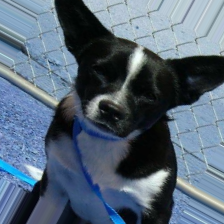

In [8]:
cats_rotated = rotation(cats)
dogs_rotated = rotation(dogs)

display(cats_rotated[0])
display(dogs_rotated[0])

array([[[132, 147, 164],
        [105, 121, 137],
        [179, 195, 211],
        ...,
        [176, 200, 217],
        [178, 197, 212],
        [179, 199, 214]],

       [[118, 134, 150],
        [175, 191, 207],
        [181, 197, 213],
        ...,
        [174, 198, 215],
        [177, 196, 211],
        [172, 191, 206]],

       [[176, 192, 208],
        [184, 201, 217],
        [166, 182, 198],
        ...,
        [177, 200, 217],
        [177, 195, 210],
        [173, 192, 207]],

       ...,

       [[ 76,  98, 147],
        [ 78, 100, 147],
        [ 64,  87, 135],
        ...,
        [117, 157, 192],
        [108, 142, 168],
        [133, 166, 193]],

       [[ 79, 102, 136],
        [ 68,  92, 126],
        [ 76, 100, 136],
        ...,
        [142, 193, 238],
        [127, 167, 199],
        [115, 153, 186]],

       [[188, 213, 235],
        [186, 211, 236],
        [147, 173, 198],
        ...,
        [ 98, 160, 218],
        [102, 146, 184],
        [100, 142, 180]]], dtype=uint8)
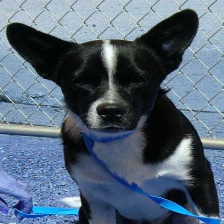

array([[[157, 161, 149],
        [159, 163, 151],
        [161, 165, 153],
        ...,
        [185, 193, 200],
        [183, 190, 200],
        [178, 187, 201]],

       [[160, 164, 152],
        [162, 166, 154],
        [163, 167, 155],
        ...,
        [185, 193, 200],
        [183, 190, 200],
        [179, 188, 202]],

       [[163, 167, 155],
        [164, 168, 156],
        [165, 169, 157],
        ...,
        [185, 192, 200],
        [183, 191, 200],
        [179, 188, 201]],

       ...,

       [[217, 223, 218],
        [216, 223, 217],
        [216, 221, 216],
        ...,
        [195, 204, 208],
        [196, 204, 209],
        [197, 205, 212]],

       [[219, 225, 220],
        [219, 225, 220],
        [218, 224, 219],
        ...,
        [197, 206, 210],
        [197, 206, 210],
        [198, 206, 213]],

       [[219, 225, 220],
        [218, 224, 219],
        [217, 223, 218],
        ...,
        [197, 206, 210],
        [197, 206, 210],
        [196, 204, 211]]], dtype=uint8)
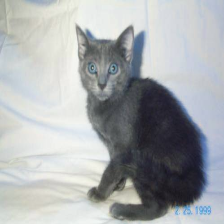

In [9]:
display(dogs[0])
display(cats[0])

Flipping:

In [10]:
def flip(images):
    flipped = []
    datagen = ImageDataGenerator(horizontal_flip=True)
    for image in images:
        flipped_img = next(datagen.flow(np.expand_dims(image, axis=0), batch_size=1))[0].astype(np.uint8)
        flipped.append(flipped_img)
    return flipped

array([[[ 82,  60,  12],
        [ 84,  67,   5],
        [ 76,  63,   0],
        ...,
        [ 86,  73,   0],
        [ 88,  75,   0],
        [ 86,  72,   1]],

       [[ 82,  61,   8],
        [ 83,  66,   0],
        [ 83,  71,   0],
        ...,
        [ 88,  75,   0],
        [ 92,  79,   4],
        [ 95,  81,   8]],

       [[ 82,  64,   3],
        [ 89,  76,   3],
        [ 87,  77,   0],
        ...,
        [ 93,  80,   4],
        [ 98,  85,   9],
        [ 93,  80,   4]],

       ...,

       [[226, 199,  25],
        [224, 195,  26],
        [215, 185,  20],
        ...,
        [255, 236,  63],
        [243, 216,  43],
        [241, 209,  46]],

       [[230, 203,  29],
        [228, 199,  30],
        [215, 185,  20],
        ...,
        [250, 226,  55],
        [234, 207,  37],
        [233, 205,  41]],

       [[231, 204,  30],
        [230, 201,  32],
        [217, 187,  22],
        ...,
        [245, 220,  51],
        [235, 210,  40],
        [232, 208,  43]]], dtype=uint8)
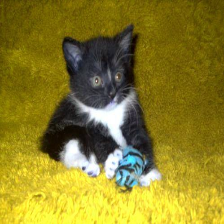

array([[[ 86,  72,   1],
        [ 88,  75,   0],
        [ 86,  73,   0],
        ...,
        [ 76,  63,   0],
        [ 84,  67,   5],
        [ 82,  60,  12]],

       [[ 95,  81,   8],
        [ 92,  79,   4],
        [ 88,  75,   0],
        ...,
        [ 83,  71,   0],
        [ 83,  66,   0],
        [ 82,  61,   8]],

       [[ 93,  80,   4],
        [ 98,  85,   9],
        [ 93,  80,   4],
        ...,
        [ 87,  77,   0],
        [ 89,  76,   3],
        [ 82,  64,   3]],

       ...,

       [[241, 209,  46],
        [243, 216,  43],
        [255, 236,  63],
        ...,
        [215, 185,  20],
        [224, 195,  26],
        [226, 199,  25]],

       [[233, 205,  41],
        [234, 207,  37],
        [250, 226,  55],
        ...,
        [215, 185,  20],
        [228, 199,  30],
        [230, 203,  29]],

       [[232, 208,  43],
        [235, 210,  40],
        [245, 220,  51],
        ...,
        [217, 187,  22],
        [230, 201,  32],
        [231, 204,  30]]], dtype=uint8)
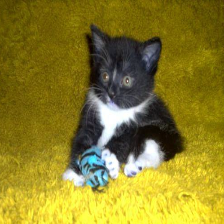

array([[[ 78,  71,  84],
        [109, 108, 118],
        [ 68,  70,  79],
        ...,
        [126, 125, 121],
        [143, 138, 134],
        [101,  81,  83]],

       [[ 82,  75,  88],
        [ 88,  87,  97],
        [ 79,  81,  90],
        ...,
        [133, 133, 129],
        [126, 123, 120],
        [ 96,  81,  82]],

       [[ 84,  78,  91],
        [ 73,  71,  81],
        [ 77,  79,  89],
        ...,
        [116, 117, 113],
        [116, 115, 111],
        [ 90,  81,  81]],

       ...,

       [[247, 247, 253],
        [247, 247, 253],
        [247, 247, 253],
        ...,
        [209, 190, 169],
        [202, 184, 161],
        [200, 182, 156]],

       [[247, 247, 253],
        [247, 247, 253],
        [247, 247, 253],
        ...,
        [211, 192, 171],
        [203, 185, 162],
        [200, 183, 157]],

       [[247, 247, 254],
        [247, 247, 253],
        [245, 245, 251],
        ...,
        [215, 196, 175],
        [212, 193, 170],
        [208, 192, 166]]], dtype=uint8)
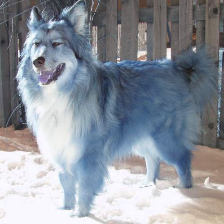

array([[[ 78,  71,  84],
        [109, 108, 118],
        [ 68,  70,  79],
        ...,
        [126, 125, 121],
        [143, 138, 134],
        [101,  81,  83]],

       [[ 82,  75,  88],
        [ 88,  87,  97],
        [ 79,  81,  90],
        ...,
        [133, 133, 129],
        [126, 123, 120],
        [ 96,  81,  82]],

       [[ 84,  78,  91],
        [ 73,  71,  81],
        [ 77,  79,  89],
        ...,
        [116, 117, 113],
        [116, 115, 111],
        [ 90,  81,  81]],

       ...,

       [[247, 247, 253],
        [247, 247, 253],
        [247, 247, 253],
        ...,
        [209, 190, 169],
        [202, 184, 161],
        [200, 182, 156]],

       [[247, 247, 253],
        [247, 247, 253],
        [247, 247, 253],
        ...,
        [211, 192, 171],
        [203, 185, 162],
        [200, 183, 157]],

       [[247, 247, 254],
        [247, 247, 253],
        [245, 245, 251],
        ...,
        [215, 196, 175],
        [212, 193, 170],
        [208, 192, 166]]], dtype=uint8)
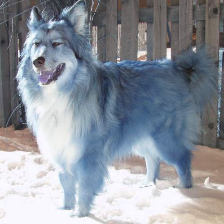

In [11]:
cats_flipped = flip(cats)
dogs_flipped = flip(dogs)

display(cats[1])
display(cats_flipped[1])
display(dogs[1])
display(dogs_flipped[1])

Zooming:

In [13]:
def zoom(images):

    zoomed = []
    zoom_range_lower = (0.75, 0.9)
    zoom_range_upper = (1.1, 1.25)

    for imagez in images:

        if random.random() < 0.5:
            zoom_value = random.uniform(*zoom_range_lower)
        else:
            zoom_value = random.uniform(*zoom_range_upper)

        image = np.expand_dims(imagez, axis=0)
        datagen = ImageDataGenerator(zoom_range=1)
        iterator = datagen.flow(image, batch_size=1)
        augmented_image = datagen.apply_transform(image[0], {'zx': zoom_value, 'zy': zoom_value})
        augmented_image_pil = Image.fromarray(augmented_image)
        zoomed.append(augmented_image_pil)

    return zoomed

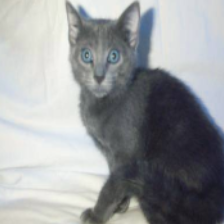

array([[[157, 161, 149],
        [159, 163, 151],
        [161, 165, 153],
        ...,
        [185, 193, 200],
        [183, 190, 200],
        [178, 187, 201]],

       [[160, 164, 152],
        [162, 166, 154],
        [163, 167, 155],
        ...,
        [185, 193, 200],
        [183, 190, 200],
        [179, 188, 202]],

       [[163, 167, 155],
        [164, 168, 156],
        [165, 169, 157],
        ...,
        [185, 192, 200],
        [183, 191, 200],
        [179, 188, 201]],

       ...,

       [[217, 223, 218],
        [216, 223, 217],
        [216, 221, 216],
        ...,
        [195, 204, 208],
        [196, 204, 209],
        [197, 205, 212]],

       [[219, 225, 220],
        [219, 225, 220],
        [218, 224, 219],
        ...,
        [197, 206, 210],
        [197, 206, 210],
        [198, 206, 213]],

       [[219, 225, 220],
        [218, 224, 219],
        [217, 223, 218],
        ...,
        [197, 206, 210],
        [197, 206, 210],
        [196, 204, 211]]], dtype=uint8)
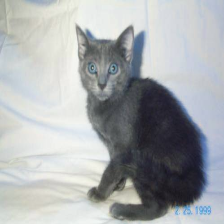

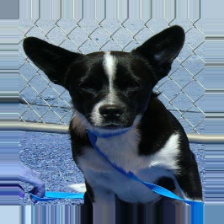

array([[[132, 147, 164],
        [105, 121, 137],
        [179, 195, 211],
        ...,
        [176, 200, 217],
        [178, 197, 212],
        [179, 199, 214]],

       [[118, 134, 150],
        [175, 191, 207],
        [181, 197, 213],
        ...,
        [174, 198, 215],
        [177, 196, 211],
        [172, 191, 206]],

       [[176, 192, 208],
        [184, 201, 217],
        [166, 182, 198],
        ...,
        [177, 200, 217],
        [177, 195, 210],
        [173, 192, 207]],

       ...,

       [[ 76,  98, 147],
        [ 78, 100, 147],
        [ 64,  87, 135],
        ...,
        [117, 157, 192],
        [108, 142, 168],
        [133, 166, 193]],

       [[ 79, 102, 136],
        [ 68,  92, 126],
        [ 76, 100, 136],
        ...,
        [142, 193, 238],
        [127, 167, 199],
        [115, 153, 186]],

       [[188, 213, 235],
        [186, 211, 236],
        [147, 173, 198],
        ...,
        [ 98, 160, 218],
        [102, 146, 184],
        [100, 142, 180]]], dtype=uint8)
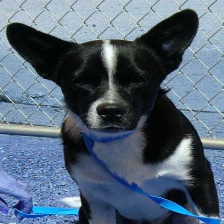

In [14]:
cats_zoomed = zoom(cats)
dogs_zoomed = zoom(dogs)

display(cats_zoomed[0])
display(cats[0])

display(dogs_zoomed[0])
display(dogs[0])

Data Gathering:

In [47]:
cat_data = cats + cats_rotated + cats_flipped + cats_zoomed
dog_data = dogs + dogs_rotated + dogs_flipped + dogs_zoomed

labels = np.concatenate((np.zeros(len(cat_data)), np.zeros(len(dog_data))+1))
images = np.concatenate((cat_data, dog_data))

print("Number of Total Data:",len(images))

Number of Total Data: 2808


Splitting data 70% 30%

In [48]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.3, stratify=labels)


In [49]:
print("Train to Total:",len(X_train)/(len(X_train)+len(X_val)) * 100,"%")

Train to Total: 69.97863247863248 %


Building VGG16 Model:

In [50]:
def vgg16_model():


    base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

    for layer in base_model.layers:
        layer.trainable = False


    model = Sequential()
    model.add(base_model)
    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(Dense(1024, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    for layer in model.layers[-3:]:
        layer.trainable = True

    LR = 0.1
    DECAY = 0.002
    MOMENTUM = 0.9

    sgd_optimizer = SGD(learning_rate= LR, decay= DECAY, momentum= MOMENTUM, clipnorm=1)
    model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [51]:
model = vgg16_model()

Model with Augmentation:

In [52]:
BATCH = 10
EPOCH = 50

history = model.fit(X_train, y_train, batch_size=BATCH, epochs=EPOCH, shuffle=True, verbose=True, validation_data=(X_val, y_val))

Epoch 1/50
197/197 [==============================] - 18s 89ms/step - loss: 5.2491 - accuracy: 0.9206 - val_loss: 0.8503 - val_accuracy: 0.9763
Epoch 2/50
197/197 [==============================] - 17s 88ms/step - loss: 1.0079 - accuracy: 0.9837 - val_loss: 0.4981 - val_accuracy: 0.9870
Epoch 3/50
197/197 [==============================] - 17s 85ms/step - loss: 0.1658 - accuracy: 0.9944 - val_loss: 0.0518 - val_accuracy: 0.9929
Epoch 4/50
197/197 [==============================] - 17s 87ms/step - loss: 1.3448e-07 - accuracy: 1.0000 - val_loss: 0.0370 - val_accuracy: 0.9964
Epoch 5/50
197/197 [==============================] - 17s 86ms/step - loss: 1.9518e-09 - accuracy: 1.0000 - val_loss: 0.0370 - val_accuracy: 0.9964
Epoch 6/50
197/197 [==============================] - 17s 85ms/step - loss: 1.8919e-09 - accuracy: 1.0000 - val_loss: 0.0370 - val_accuracy: 0.9964
Epoch 7/50
197/197 [==============================] - 17s 85ms/step - loss: 1.8401e-09 - accuracy: 1.0000 - val_loss: 0.0370

Plotting:

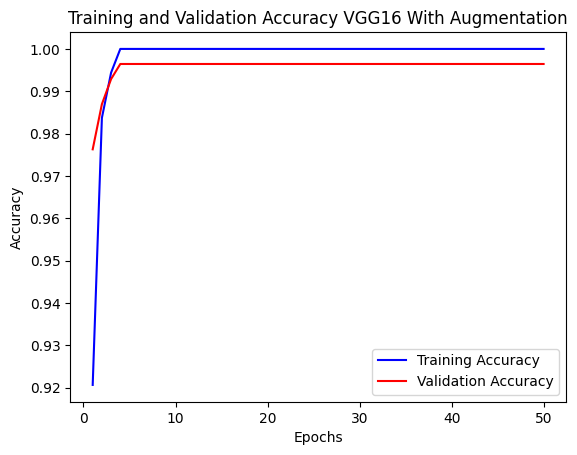

In [54]:
val_accuracy = history.history['val_accuracy']

train_accuracy = history.history['accuracy']

epochs = range(1, 50 + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy VGG16 With Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

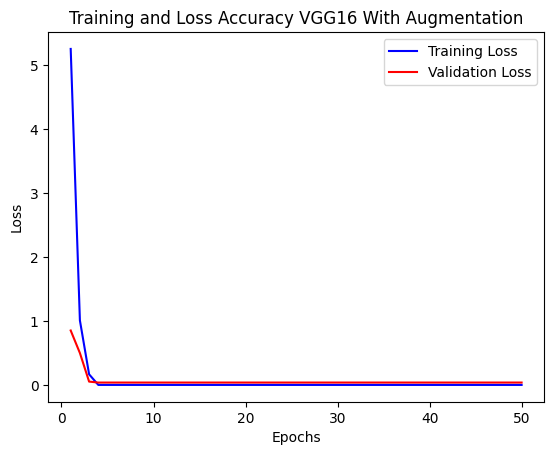

In [55]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Loss Accuracy VGG16 With Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model without Augmentation:

In [56]:
cat_data = cats
dog_data = dogs
labels = np.concatenate((np.zeros(len(cat_data)), np.zeros(len(dog_data))+1))
images = np.concatenate((cat_data, dog_data))

print("Number of Total Data:",len(images))

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.3, stratify=labels)


Number of Total Data: 702


In [57]:
model2 = vgg16_model()

In [58]:
history2 = model2.fit(X_train, y_train, batch_size=BATCH, epochs=EPOCH, shuffle=True, verbose=True, validation_data=(X_val, y_val))

Epoch 1/50
50/50 [==============================] - 5s 92ms/step - loss: 8.1192 - accuracy: 0.8880 - val_loss: 14.6300 - val_accuracy: 0.7109
Epoch 2/50
50/50 [==============================] - 4s 85ms/step - loss: 2.8561 - accuracy: 0.9654 - val_loss: 3.4184 - val_accuracy: 0.9479
Epoch 3/50
50/50 [==============================] - 4s 85ms/step - loss: 1.5983 - accuracy: 0.9776 - val_loss: 2.1892 - val_accuracy: 0.9858
Epoch 4/50
50/50 [==============================] - 4s 86ms/step - loss: 0.0902 - accuracy: 0.9959 - val_loss: 4.1258 - val_accuracy: 0.9621
Epoch 5/50
50/50 [==============================] - 4s 88ms/step - loss: 0.3766 - accuracy: 0.9939 - val_loss: 3.2892 - val_accuracy: 0.9763
Epoch 6/50
50/50 [==============================] - 4s 88ms/step - loss: 0.1902 - accuracy: 0.9980 - val_loss: 4.4472 - val_accuracy: 0.9810
Epoch 7/50
50/50 [==============================] - 4s 87ms/step - loss: 0.1721 - accuracy: 0.9980 - val_loss: 4.0834 - val_accuracy: 0.9621
Epoch 8/50
5

Plotting:

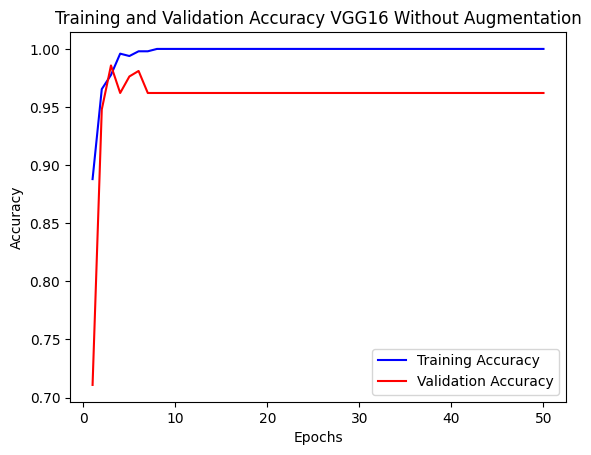

In [64]:
val_accuracy = history2.history['val_accuracy']

train_accuracy = history2.history['accuracy']

epochs = range(1, 50 + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy VGG16 Without Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

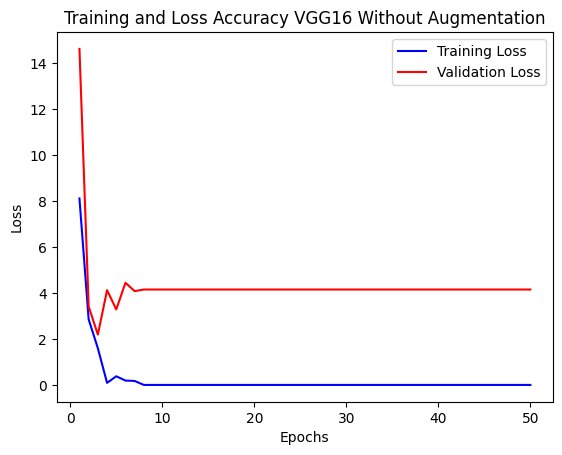

In [65]:
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Loss Accuracy VGG16 Without Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

ResNet50:

In [61]:
def ResNet_model():


    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    for layer in base_model.layers:
        layer.trainable = False


    model = Sequential()
    model.add(base_model)
    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(Dense(1024, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    for layer in model.layers[-3:]:
        layer.trainable = True

    LR = 0.1
    DECAY = 0.002
    MOMENTUM = 0.9

    sgd_optimizer = SGD(learning_rate= LR, decay= DECAY, momentum= MOMENTUM, clipnorm=1)
    model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

Without Augmentation:

In [62]:
model3 = ResNet_model()

94765736/94765736 [==============================] - 1s 0us/step


In [63]:
history3 = model3.fit(X_train, y_train, batch_size=BATCH, epochs=EPOCH, shuffle=True, verbose=True, validation_data=(X_val, y_val))

Epoch 1/50
50/50 [==============================] - 78s 131ms/step - loss: 1.2017 - accuracy: 0.9206 - val_loss: 0.3328 - val_accuracy: 0.9716
Epoch 2/50
50/50 [==============================] - 5s 91ms/step - loss: 0.4908 - accuracy: 0.9552 - val_loss: 1.0757 - val_accuracy: 0.9479
Epoch 3/50
50/50 [==============================] - 5s 100ms/step - loss: 0.0918 - accuracy: 0.9919 - val_loss: 2.0772 - val_accuracy: 0.9621
Epoch 4/50
50/50 [==============================] - 4s 75ms/step - loss: 0.1496 - accuracy: 0.9980 - val_loss: 2.4351 - val_accuracy: 0.9147
Epoch 5/50
50/50 [==============================] - 4s 84ms/step - loss: 0.0019 - accuracy: 0.9980 - val_loss: 1.6928 - val_accuracy: 0.9716
Epoch 6/50
50/50 [==============================] - 4s 85ms/step - loss: 1.4181e-09 - accuracy: 1.0000 - val_loss: 1.8606 - val_accuracy: 0.9668
Epoch 7/50
50/50 [==============================] - 4s 74ms/step - loss: 5.4109e-09 - accuracy: 1.0000 - val_loss: 1.8613 - val_accuracy: 0.9668
Ep

Plotting:

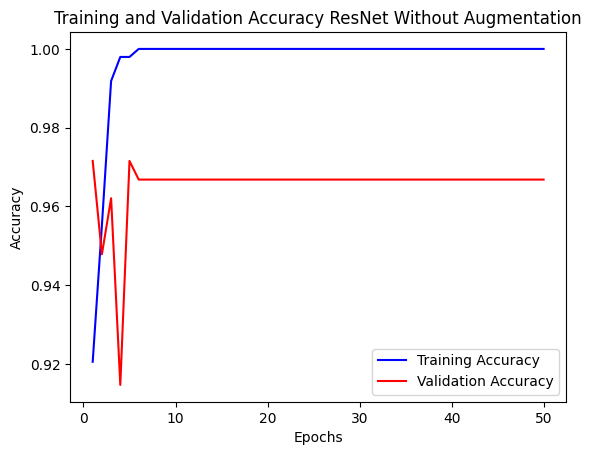

In [66]:
val_accuracy = history3.history['val_accuracy']

train_accuracy = history3.history['accuracy']

epochs = range(1, 50 + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy ResNet Without Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

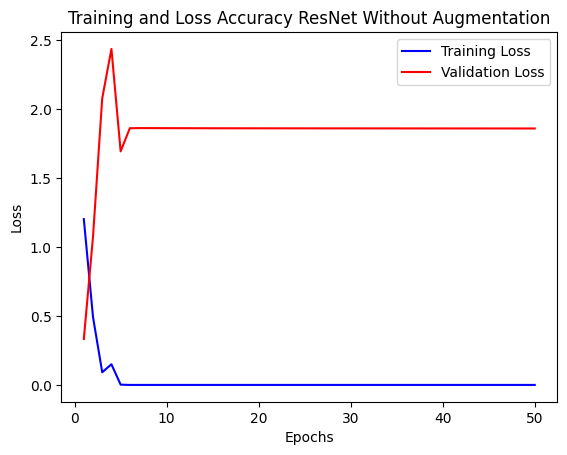

In [67]:
train_loss = history3.history['loss']
val_loss = history3.history['val_loss']

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Loss Accuracy ResNet Without Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

With Augmentation:

In [68]:
cat_data = cats + cats_rotated + cats_flipped + cats_zoomed
dog_data = dogs + dogs_rotated + dogs_flipped + dogs_zoomed

labels = np.concatenate((np.zeros(len(cat_data)), np.zeros(len(dog_data))+1))
images = np.concatenate((cat_data, dog_data))

print("Number of Total Data:",len(images))

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.3, stratify=labels)


Number of Total Data: 2808


In [69]:
model4 = ResNet_model()

In [70]:
history4 = model4.fit(X_train, y_train, batch_size=BATCH, epochs=EPOCH, shuffle=True, verbose=True, validation_data=(X_val, y_val))

Epoch 1/50
197/197 [==============================] - 22s 96ms/step - loss: 0.6195 - accuracy: 0.9389 - val_loss: 0.0516 - val_accuracy: 0.9929
Epoch 2/50
197/197 [==============================] - 17s 84ms/step - loss: 0.1231 - accuracy: 0.9924 - val_loss: 0.0767 - val_accuracy: 0.9893
Epoch 3/50
197/197 [==============================] - 17s 84ms/step - loss: 0.0314 - accuracy: 0.9980 - val_loss: 0.1149 - val_accuracy: 0.9893
Epoch 4/50
197/197 [==============================] - 17s 84ms/step - loss: 0.0100 - accuracy: 0.9990 - val_loss: 0.0186 - val_accuracy: 0.9941
Epoch 5/50
197/197 [==============================] - 14s 72ms/step - loss: 2.7438e-05 - accuracy: 1.0000 - val_loss: 0.0291 - val_accuracy: 0.9964
Epoch 6/50
197/197 [==============================] - 16s 84ms/step - loss: 1.6837e-07 - accuracy: 1.0000 - val_loss: 0.0287 - val_accuracy: 0.9964
Epoch 7/50
197/197 [==============================] - 17s 84ms/step - loss: 1.3937e-07 - accuracy: 1.0000 - val_loss: 0.0286 - v

Plotting:

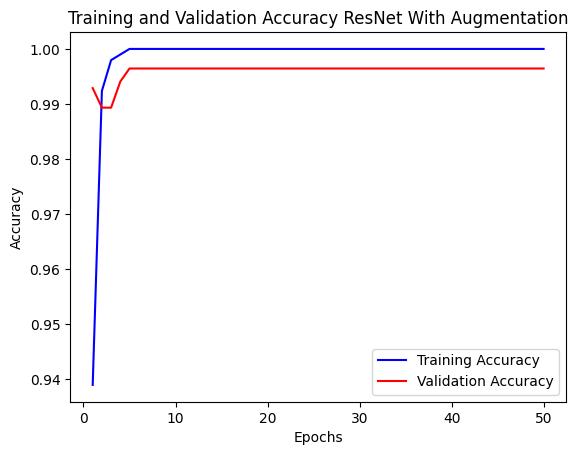

In [71]:
val_accuracy = history4.history['val_accuracy']

train_accuracy = history4.history['accuracy']

epochs = range(1, 50 + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy ResNet With Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

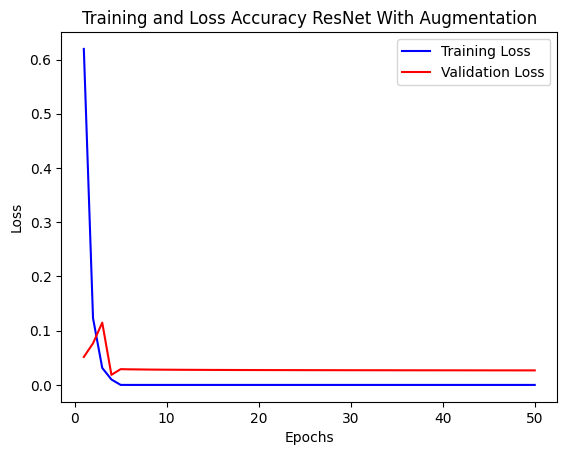

In [72]:
train_loss = history4.history['loss']
val_loss = history4.history['val_loss']

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Loss Accuracy ResNet With Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Test:

In [73]:
cat_test = '/content/drive/MyDrive/NN/HW2/Dataset/NonAug/Test/Cats'

dog_test = '/content/drive/MyDrive/NN/HW2/Dataset/NonAug/Test/Dogs'

Cat_test = read_images(cat_test)
Dog_test = read_images(dog_test)

In [74]:
print(len(Cat_test))
print(len(Dog_test))

50
50


In [75]:
labels1 = np.concatenate((np.zeros(len(Cat_test)), np.zeros(len(Dog_test))+1))
images1 = np.concatenate((Cat_test, Dog_test))

print("Number of Total Data:",len(images1))

X_test = images1
y_test = labels1

Number of Total Data: 100


In [76]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Accuracy for VGG16 with Augmentation:", test_accuracy)

4/4 [==============================] - 8s 105ms/step - loss: 1.5124 - accuracy: 0.9400
Test Accuracy for VGG16 with Augmentation: 0.9399999976158142


In [77]:
test_loss, test_accuracy = model2.evaluate(X_test, y_test)

print("Test Accuracy for VGG16 without Augmentation:", test_accuracy)

4/4 [==============================] - 1s 105ms/step - loss: 6.8296 - accuracy: 0.9500
Test Accuracy for VGG16 without Augmentation: 0.949999988079071


In [78]:
test_loss, test_accuracy = model3.evaluate(X_test, y_test)

print("Test Accuracy for ResNet50 without Augmentation:", test_accuracy)

4/4 [==============================] - 3s 348ms/step - loss: 1.0742 - accuracy: 0.9800
Test Accuracy for ResNet50 without Augmentation: 0.9800000190734863


In [79]:
test_loss, test_accuracy = model4.evaluate(X_test, y_test)

print("Test Accuracy for ResNet50 with Augmentation:", test_accuracy)

4/4 [==============================] - 0s 82ms/step - loss: 0.0841 - accuracy: 0.9800
Test Accuracy for ResNet50 with Augmentation: 0.9800000190734863
